In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [497]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [498]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [499]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

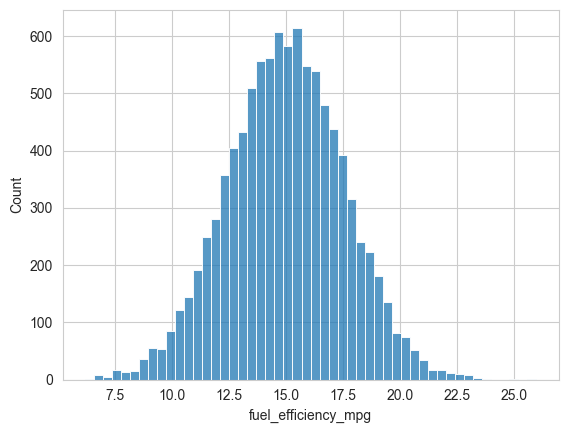

In [500]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

1

In [501]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

2

In [502]:
df['horsepower'].median()

np.float64(149.0)

In [503]:
n = len(df)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

In [504]:
n, n_train + n_val + n_test

(9704, 9704)

In [505]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [506]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
5819,160,156.0,2990.334203,2020,15.294958
5820,240,105.0,3495.100812,2014,12.426054
5821,210,171.0,3434.252180,2011,12.509291
5822,180,172.0,2967.708852,2018,14.746571


In [507]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [508]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [509]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [510]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [511]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [512]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


3

In [513]:
target = 'fuel_efficiency_mpg'
features = df.columns[df.columns != target].tolist()

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


In [514]:
def rmse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [515]:
X_train_zero = df_train[features].fillna(0).to_numpy()
y_train = df_train['fuel_efficiency_mpg'].to_numpy()

X_val_zero = df_val[features].fillna(0).to_numpy()
y_val = df_val['fuel_efficiency_mpg'].to_numpy()

w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

y_pred_zero = w0_zero + X_train_zero.dot(w_zero)

rmse_zero = round(rmse(y_val, y_pred_zero), 2)

ValueError: operands could not be broadcast together with shapes (1940,) (5824,) 

In [516]:
rmse_zero

np.float64(0.52)

In [517]:
horsepower_mean = df_train['horsepower'].mean()

X_train_mean = df_train[features].fillna(horsepower_mean).to_numpy()


X_val_mean = df_val[features].fillna(horsepower_mean).to_numpy()


w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_zero = w0_mean + X_train_mean.dot(w_mean)

rmse_mean = round(rmse(y_val, y_pred_zero), 2)

ValueError: operands could not be broadcast together with shapes (1940,) (5824,) 

In [518]:
rmse_mean

np.float64(0.46)

4

In [519]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [520]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores={}

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w0 + X_val_zero.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    rmse_scores[r] = score
    print(f"r = {r:<4} | RMSE = {score}")


r = 0    | RMSE = 0.52
r = 0.01 | RMSE = 0.52
r = 0.1  | RMSE = 0.52
r = 1    | RMSE = 0.52
r = 5    | RMSE = 0.52
r = 10   | RMSE = 0.52
r = 100  | RMSE = 0.52


In [521]:
# 1. Train the model (this part is correct)
w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

# 2. Make predictions using the CORRECT validation feature matrix.
# It must have 5824 rows to match y_val.
# Let's call it X_val_prepared for clarity.
y_pred = w0 + X_val_zero.dot(w) # <-- Use the correct matrix here

# 3. Now, y_val and y_pred will both have the shape (5824,), so the RMSE will work.
score = round(rmse(y_val, y_pred), 2)
rmse_scores[r] = score
print(f"r = {r:<4} | RMSE = {score}")

r = 100  | RMSE = 0.52


In [474]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:

sns.set_style("whitegrid")

In [476]:

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
df.sample(3, random_state=42)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822


In [477]:
cols = [
    "engine_displacement",
    "horsepower",
    "vehicle_weight",
    "model_year",
    "fuel_efficiency_mpg",
]

df = df.loc[:, cols]
df.sample(3, random_state=42)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822


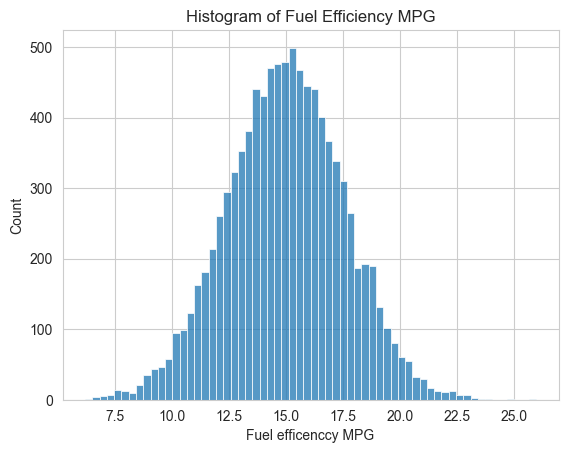

In [478]:

sns.histplot(data=df, x="fuel_efficiency_mpg")
plt.title("Histogram of Fuel Efficiency MPG")
plt.xlabel("Fuel efficenccy MPG")
plt.show()  # It has a bell-shaped distribution

In [479]:
(df.isnull().sum().reset_index(name="missing").query("missing > 0"))


,index,missing
1,horsepower,708


In [480]:

print(f"The median (50% percentil) for horsepower is {df.horsepower.median()}")

The median (50% percentil) for horsepower is 149.0


In [481]:

# size of train/val/test sets
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n == (n_train + n_test + n_val)

True

In [482]:

# shuffle the dataset and create the sets
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val :]].copy()

In [483]:

target = "fuel_efficiency_mpg"
features = df.columns[df.columns != target].tolist()


def train_linear_regression(X, y):
    """
    Trains a linear regression model using the normal equation.
    """
    # Add a bias term (column of ones) to the feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Normal equation: w = (X^T * X)^-1 * X^T * y
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


def rmse(y_true, y_pred):
    """
    Calculates the Root Mean Squared Error.
    """
    error = y_true - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)

In [484]:

# Filling missing horsepower with 0
X_train_zero = df_train[features].fillna(0).to_numpy()
y_train = df_train[target].to_numpy()

X_val_zero = df_val[features].fillna(0).to_numpy()
y_val = df_val[target].to_numpy()

# Train the model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Get predictions on the validation set
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

# Calculate and round the RMSE
rmse_zero = round(rmse(y_val, y_pred_zero), 2)

In [485]:

# Mean of horsepower from training data
horsepower_mean = df_train["horsepower"].mean()

# Filling missing values with the calculated mean
X_train_mean = df_train[features].fillna(horsepower_mean).to_numpy()
X_val_mean = df_val[features].fillna(horsepower_mean).to_numpy()

# Notice that y_train and y_val are the same as before

# Train the model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Get predictions on the validation set
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Calculate and round the RMSE
rmse_mean = round(rmse(y_val, y_pred_mean), 2)

In [486]:

print(f"RMSE when filling missing values in horsepower with zero: {rmse_zero}")
print(f"RMSE when filling missing values in horsepower with mean: {rmse_mean}")

RMSE when filling missing values in horsepower with zero: 0.52
RMSE when filling missing values in horsepower with mean: 0.46


In [487]:

def train_linear_regression_reg(X, y, r=0.0):
    """
    Trains a regularized linear regression model using the normal equation.
    """
    # Add a bias term (column of ones)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Normal equation with regularization: w = (X^T*X + r*I)^-1 * X^T*y
    XTX = X.T.dot(X)

    # Create the identity matrix for regularization
    reg = r * np.eye(XTX.shape[0])

    # Set the first element to 0 to not regularize the bias term
    # reg[0, 0] = 0

    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [488]:

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    # Train the regularized model
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    # Make predictions on the validation set
    y_pred = w0 + X_val_zero.dot(w)

    # Calculate and round the RMSE
    score = round(rmse(y_val, y_pred), 2)

    # Store the result
    rmse_scores[r] = score

    print(f"r = {r:<4} | RMSE = {score}")

r = 0    | RMSE = 0.52
r = 0.01 | RMSE = 0.52
r = 0.1  | RMSE = 0.52
r = 1    | RMSE = 0.52
r = 5    | RMSE = 0.52
r = 10   | RMSE = 0.52
r = 100  | RMSE = 0.52


In [489]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Set the seed for this iteration's data split
    np.random.seed(seed)

    # Shuffle the dataset indices
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    # Create the data splits
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
    df_test = df.iloc[idx[n_train + n_val :]].copy()

    # Prepare data (fill missing values with 0)
    X_train = df_train[features].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()

    X_val = df_val[features].fillna(0).to_numpy()
    y_val = df_val[target].to_numpy()

    # Train the model (without regularization)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    # Calculate and store the score
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

    print(f"Seed: {seed} -> RMSE: {round(score, 3)}")

Seed: 0 -> RMSE: 0.521
Seed: 1 -> RMSE: 0.521
Seed: 2 -> RMSE: 0.523
Seed: 3 -> RMSE: 0.516
Seed: 4 -> RMSE: 0.511
Seed: 5 -> RMSE: 0.528
Seed: 6 -> RMSE: 0.531
Seed: 7 -> RMSE: 0.509
Seed: 8 -> RMSE: 0.515
Seed: 9 -> RMSE: 0.513


In [490]:

# Standard deviation of the scores
std_dev = round(np.std(rmse_scores), 5)
print(f"The standard deviation of the RMSE scores is: {std_dev}")

The standard deviation of the RMSE scores is: 0.00699


In [491]:
np.random.seed(seed)

# Split the data with 60%/20%/20% distribution
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

# Create the data splits
df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train : n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val :]].copy()

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

In [493]:

# Prepare data (fill missing values with 0)
X_train_val = df_train_val[features].fillna(0).to_numpy()
y_train_val = df_train_val[target].to_numpy()

X_test = df_test[features].fillna(0).to_numpy()
y_test = df_test[target].to_numpy()

# Train the model with r=0.001
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Make predictions on the test set
y_pred_test = w0 + X_test.dot(w)

# Calculate RMSE on the test set
rmse_test = round(rmse(y_test, y_pred_test), 4)

print(f"The RMSE on the test dataset is: {rmse_test}")



The RMSE on the test dataset is: 0.5156
